Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

Problem Statemen#
t
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

Objec
tive
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

Research Q----uestion
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?


In [873]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


In [737]:
#Loading the dataset
df=pd.read_csv('yellow_tripdata_2020-01.csv')

In [738]:

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [741]:
#Exploraropry data analysis
df.shape

(6405008, 18)

In [743]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [745]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [747]:
df['duration']=df['tpep_pickup_datetime']-df['tpep_dropoff_datetime']

In [749]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,-1 days +23:55:12
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,-1 days +23:52:35
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,-1 days +23:53:49
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,-1 days +23:55:09
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,-1 days +23:57:42


In [751]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [753]:
df['duration'] = df['duration'].dt.total_seconds() / 60


In [755]:
df=df[['passenger_count','trip_distance','payment_type','fare_amount','duration']]

In [757]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [759]:
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [761]:
(65441/len(df))*100

1.021716132126611

In [763]:
df.dropna(inplace=True)

In [765]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
6339562,1.0,2.10,1.0,11.0,14.233333
6339563,1.0,2.13,1.0,13.0,19.000000
6339564,1.0,2.55,1.0,12.5,16.283333
6339565,1.0,1.61,2.0,8.5,9.633333


In [767]:
df['passenger_count']=df['passenger_count'].astype('int64')

In [769]:
df['payment_type']=df['payment_type'].astype('int64')

In [771]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,1,6.0,4.800000
1,1,1.20,1,7.0,7.416667
2,1,0.60,1,6.0,6.183333
3,1,0.80,1,5.5,4.850000
4,1,0.00,2,3.5,2.300000
...,...,...,...,...,...
6339562,1,2.10,1,11.0,14.233333
6339563,1,2.13,1,13.0,19.000000
6339564,1,2.55,1,12.5,16.283333
6339565,1,1.61,2,8.5,9.633333


In [773]:
#duplicate finding 
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [774]:
print("Before:", df.shape)
df.drop_duplicates(inplace=True)
print("After:", df.shape)


Before: (6339567, 5)
After: (3007861, 5)


In [775]:
df.shape

(3007861, 5)

In [777]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [778]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [779]:
#df = df[df['passenger_count'].between(1, 6)]
df=df[(df['passenger_count']>0) & (df['passenger_count']<=6)]

In [785]:
df=df[df['payment_type']<3]

In [787]:
df.shape

(2898158, 5)

In [789]:
df['passenger_count'].value_counts().unique

<bound method Series.unique of passenger_count
1    1720358
2     565797
3     197946
5     188786
6     117875
4     107396
Name: count, dtype: int64>

In [791]:
df['payment_type'].value_counts().unique

<bound method Series.unique of payment_type
1    1993335
2     904823
Name: count, dtype: int64>

In [793]:
df['payment_type'].unique()

array([1, 2], dtype=int64)

In [795]:
df['payment_type'].value_counts()

payment_type
1    1993335
2     904823
Name: count, dtype: int64

In [797]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [799]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,Card,6.0,4.800000
1,1,1.2,Card,7.0,7.416667
2,1,0.6,Card,6.0,6.183333
3,1,0.8,Card,5.5,4.850000
4,1,0.0,Cash,3.5,2.300000


In [801]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.898158e+06,2.898158e+06,2.898158e+06,2.898158e+06
mean,1.906919e+00,4.479349e+00,1.761232e+01,2.402879e+01
std,1.427756e+00,4.867743e+00,1.495772e+01,9.293099e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.470000e+00,8.500000e+00,9.716667e+00
50%,1.000000e+00,2.690000e+00,1.300000e+01,1.553333e+01
75%,2.000000e+00,5.370000e+00,2.100000e+01,2.318333e+01
max,6.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [802]:
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]

In [804]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.866585e+06,2.866585e+06,2.866585e+06,2.866585e+06
mean,1.913070e+00,4.523730e+00,1.747778e+01,2.405541e+01
std,1.431386e+00,4.869850e+00,1.437862e+01,9.305349e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.500000e+00,8.500000e+00,9.783333e+00
50%,1.000000e+00,2.710000e+00,1.300000e+01,1.556667e+01
75%,2.000000e+00,5.410000e+00,2.050000e+01,2.313333e+01
max,6.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [806]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Card,10.5,12.383333
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000


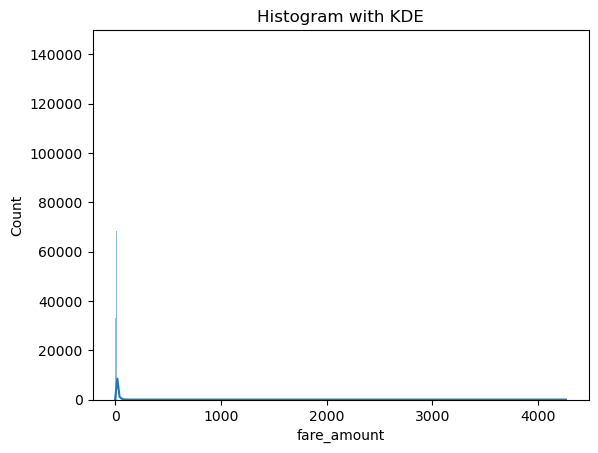

In [809]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['fare_amount'], kde=True)
plt.title('Histogram with KDE')
plt.show()


In [710]:
#flag outlier

In [711]:
import statsmodels.api as sm


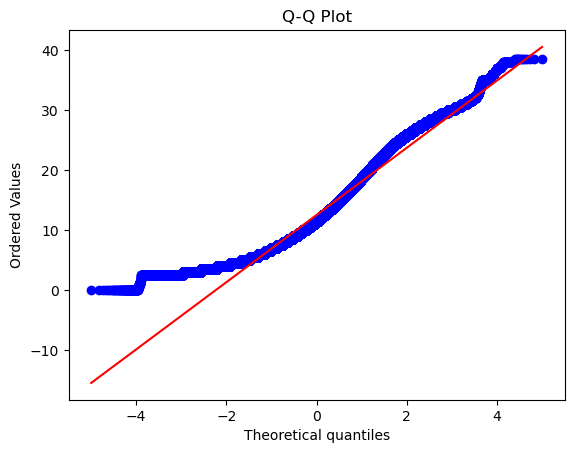

In [813]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['fare_amount'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [811]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [815]:
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
5,1,0.03,Cash,2.5,0.883333
...,...,...,...,...,...
6339550,4,2.40,Card,10.5,12.383333
6339555,3,2.09,Card,10.0,14.800000
6339561,1,4.11,Card,17.5,21.500000
6339563,1,2.13,Card,13.0,19.000000


In [817]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.395692e+06,2.395692e+06,2.395692e+06,2.395692e+06
mean,1.978273e+00,2.811087e+00,1.250380e+01,1.447726e+01
std,1.470032e+00,1.939465e+00,5.734870e+00,7.278957e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.350000e+00,8.000000e+00,8.883333e+00
50%,1.000000e+00,2.290000e+00,1.150000e+01,1.373333e+01
75%,2.000000e+00,3.760000e+00,1.600000e+01,1.926667e+01
max,6.000000e+00,8.820000e+00,3.850000e+01,3.573333e+01


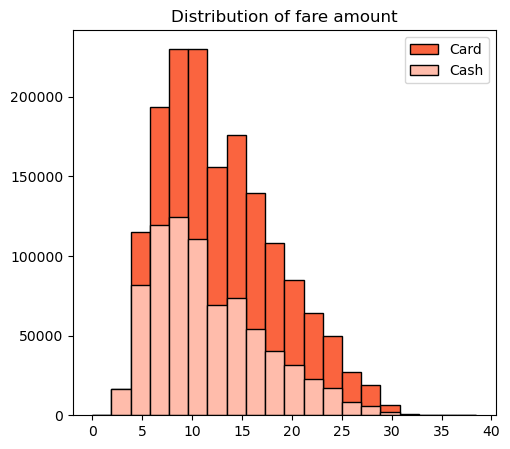

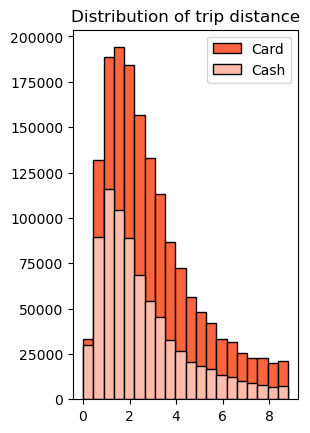

In [819]:
#to find the distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()
#to understand the fare amount is paid thrugh cash or card?the highest amount paid through cash is  5-11 £ and in almost 125000 trips
#for card  the highest amount paid is 8-10 pounds and it is for for more than 200000 trps


In [821]:
#for fare amount --Most rides are priced between $5–$15, and while both cash and card are used in this range, cash dominates the lower end (especially $5–$10).
#For rides above $15, card is the clear preference, suggesting a strong relationship between fare amount and payment type.
#for duration----The distribution of trip distances is right-skewed, with most rides under 3 km. Cash is commonly used for short-distance trips, while card payments become more frequent as distance increases. For longer trips (above ~3.5 km), card payments dominate, suggesting a strong association between trip length and choice of payment method. 

In [823]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.921630  5.776835      2.930817  1.955602
Cash           11.634799  5.546694      2.562072  1.881217

In [825]:
 #to find the % of people choosing card and cash


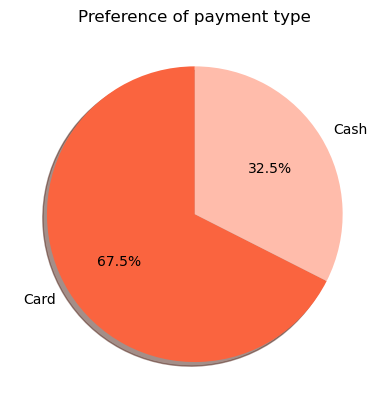

In [827]:
plt.title('Preference of payment type')
plt.pie(
    df['payment_type'].value_counts(normalize=True),  # Get proportion of each type (as %)
    labels=df['payment_type'].value_counts().index,   # Use 'Card' and 'Cash' as labels
    startangle=90,     # Rotate so the pie starts from the top (12 o'clock position)
    shadow=True,       # Adds a 3D shadow effect
    autopct='%1.1f%%', # Show percentage values with 1 decimal place
    colors=['#FA643F','#FFBCAB']  # Custom colors (dark and light orange)
)
plt.show()

In [829]:
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         904168
             2                         326663
             3                         122139
             4                          63537
             5                         123749
             6                          77563
Cash         1                         458747
             2                         155085
             3                          54398
             4                          32646
             5                          47526
             6                          29471

In [831]:
# Step 1: Group by payment_type and passenger_count, then count the number of records
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# Step 2: Rename the column from 'passenger_count' to 'count' for clarity
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)

# Step 3: Reset index so that 'payment_type' and 'passenger_count' become columns again
passenger_count.reset_index(inplace = True)
 

In [833]:
# Step 4: Create a new column 'perc' = percentage of total records this group represents
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum()) * 100

In [835]:
passenger_count 

,payment_type,passenger_count,count,perc
0,Card,1,904168,37.741413
1,Card,2,326663,13.635434
2,Card,3,122139,5.098276
3,Card,4,63537,2.652136
4,Card,5,123749,5.165480
5,Card,6,77563,3.237603
6,Cash,1,458747,19.148830
7,Cash,2,155085,6.473495
8,Cash,3,54398,2.270659
9,Cash,4,32646,1.362696


In [837]:
passenger_df=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
passenger_df['payment_type']=['Card','Cash']
passenger_df.iloc[0,1:]=passenger_count.iloc[0:5,-1]



In [839]:
passenger_df.iloc[1,1:]=passenger_count.iloc[5:10,-1]

In [845]:
passenger_df

,payment_type,1,2,3,4,5
0,Card,37.741413,13.635434,5.098276,2.652136,5.16548
1,Cash,3.237603,19.14883,6.473495,2.270659,1.362696


In [849]:
#df

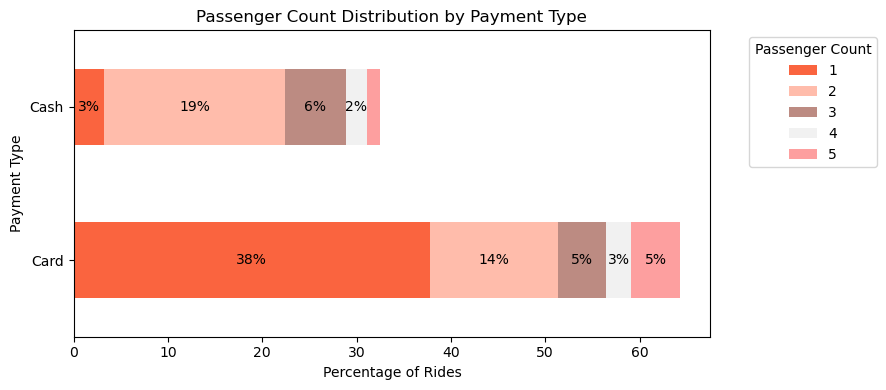

In [852]:
import matplotlib.pyplot as plt

# Step 1: Create the horizontal stacked bar chart and store the axis in 'ax'
ax = passenger_df.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['#FA643F', '#FFBCAB', '#BC8B82', '#F1F1F1', '#FD9F9F'],
    figsize=(9, 4)
)

# Step 2: Add percentage text labels inside each bar segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Only show label if the width (percentage) is big enough
    if width > 2:
        ax.text(
            x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            ha='center',
            va='center'
        )

# Step 3: Style the plot
plt.title('Passenger Count Distribution by Payment Type')
plt.xlabel('Percentage of Rides')
plt.ylabel('Payment Type')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [854]:
#for prooof we do the hypothesis
#null hypothesis ; there is no difference in average fare bw customers who use credit cards and customers who use cash 
#alternative hypothesis:there is difference in average fare bw customers who use credit cards and customers who use cash 

In [856]:
import statsmodels.api as sm

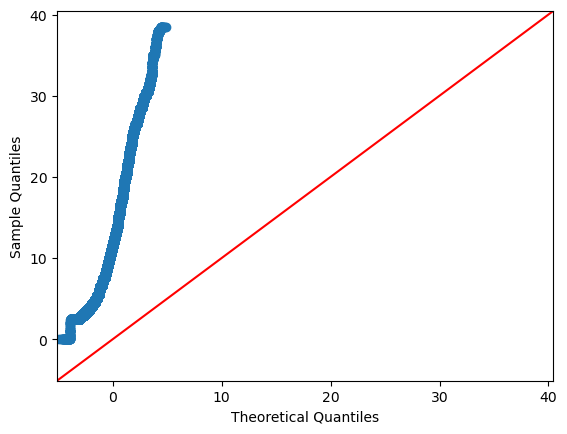

In [858]:
sm.qqplot(df['fare_amount'], line='45')
plt.show()

In [860]:
df.columns

Index(['passenger_count', 'trip_distance', 'payment_type', 'fare_amount',
       'duration'],
      dtype='object')

In [ ]:
#the data is not normally distributed 

In [866]:
# 1. Importing the required function from scipy
from scipy.stats import mannwhitneyu

# 2. Splitting the data into two groups based on payment type
# Group 1: Fares paid using Card
card_sample = df[df['payment_type'] == 'Card']['fare_amount']

# Group 2: Fares paid using Cash
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

# 3. Performing the Mann-Whitney U Test
# We use alternative='two-sided' because we're testing for any difference, not a specific direction
u_stat, p_value = mannwhitneyu(card_sample, cash_sample, alternative='two-sided')

# 4. Printing the U statistic and p-value to interpret results
print("U Statistic:", u_stat)        # The test statistic based on rank comparisons
print("p-value:", p_value)           # Probability that the observed difference happened by chance

# 5. Choosing a significance level (alpha = 0.05 means 5% threshold for significance)
alpha = 0.05

# 6. Interpreting the result based on the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in fare amounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


U Statistic: 714031552642.5
p-value: 0.0
Reject the null hypothesis: There is a significant difference in fare amounts.


🔹 U Statistic: 714031552642.5
This is the result of the ranking-based comparison.

The exact value isn’t interpreted alone — it’s used with the p-value.

Very large because you have a large dataset (~2.4 million rows).

🔹 p-value: 0.0
This means the probability that the observed difference is due to chance is extremely small (practically 0).

Since p < 0.05 (common significance level), you reject the null hypothesis.

Conclusion

Based on the Mann-Whitney U test (U = 714B, p < 0.001), we reject the null hypothesis and conclude that there is a statistically significant difference in fare amounts between rides paid using credit cards and those paid in cash.



 Recommendations
Encourage card payments through nudges:

Offer discounts or reward points for card usage.

Highlight security and convenience benefits to customers.

Driver strategy:

Drivers can prioritize routes or regions where card payments are more common (e.g., airports, business hubs).

Partner with platforms (e.g., Uber, Ola) to improve card adoption through in-app prompts.

Operational decisions:

Taxi aggregators can promote in-app card payments as the default method.

Use the analysis to forecast revenue more accurately based on payment type behavior.

🧪 Final Data-Driven Statement
Since card payments are statistically associated with higher fare amounts, promoting them can be an effective strategy for maximizing revenue for taxi drivers — without negatively affecting customer experience.

